In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(context="notebook", style="whitegrid", palette=sns.color_palette("RdBu"))

# sigmoid function

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

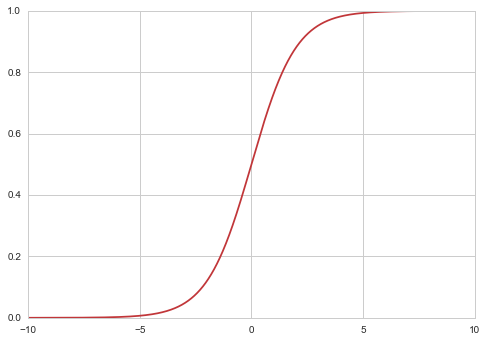

In [25]:
x = np.arange(-10, 10, step=0.01)
y = sigmoid(x)

plt.plot(x,y)